# 3.Bus EDA

## 3.1 Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
bus_df = pd.read_csv('./data/bus_cleaned.csv')

## 3.2 Overview

In [4]:
bus_df.head()

,exact_date,route_num,exact_time,day_of_week,location,incident,delay_min,gap_min,direction,vehicle,year,month,day,hour,min,at_station,delay_type,direction_simp
0,2014-01-01,95,12:23:00 AM,Wednesday,YORK MILLS STATION,Mechanical,10.0,20.0,E,1734.0,2014,1,1,0,23,1,short,E
1,2014-01-01,102,12:55:00 AM,Wednesday,ENTIRE RUN FOR ROUTE,General Delay,33.0,66.0,b/w,8110.0,2014,1,1,0,55,0,long,W
2,2014-01-01,54,1:28:00 AM,Wednesday,LAWRENCE AND WARDEN,Mechanical,10.0,20.0,WB,7478.0,2014,1,1,1,28,0,short,W
3,2014-01-01,112,1:30:00 AM,Wednesday,KIPLING STATION,Emergency Services,18.0,36.0,N,8084.0,2014,1,1,1,30,1,medium,N
4,2014-01-01,24,1:37:00 AM,Wednesday,VP AND ELLESMERE,Investigation,10.0,20.0,n,7843.0,2014,1,1,1,37,0,short,N


In [8]:
bus_df.shape

(466507, 18)

In [6]:
# Excluding delay min is 0.
actual_delay = bus_df[bus_df['delay_min'] > 1]

In [7]:
actual_delay.shape

(443166, 18)

In [ ]:
no_delay = bus_df[bus_df['delay_min'] == 0]

In [11]:
print("There's %d records of incident and %d columns in the bus dataset but actual delays only have %d records."%(bus_df.shape[0],bus_df.shape[1], actual_delay.shape[0]))
print("Actual delays consist of %.f%% of the subway dataset" %(actual_delay.shape[0]/bus_df.shape[0] * 100))

There's 466507 records of incident and 18 columns in the bus dataset but actual delays only have 443166 records.
Actual delays consist of 95% of the subway dataset


In [5]:
print('The bus dataset starts from %s to %s.'%(bus_df.iloc[0]['exact_date'],bus_df.iloc[-1]['exact_date']))

The bus dataset starts from 2014-01-01 to 2020-08-15.


## 3.3 Check Missing values

In [12]:
missing_vals_bus = (actual_delay.isnull().sum() / actual_delay.shape[0]) * 100 
missing_vals_bus[missing_vals_bus > 0].sort_values(ascending=False)

vehicle           14.763317
direction          1.929074
direction_simp     0.467771
incident           0.199925
location           0.136066
gap_min            0.126363
dtype: float64

### Insights
- There's a lot of vehicle numbers missing in the bus dataset, about 15%.

In [13]:
actual_delay.columns

Index(['exact_date', 'route_num', 'exact_time', 'day_of_week', 'location',
       'incident', 'delay_min', 'gap_min', 'direction', 'vehicle', 'year',
       'month', 'day', 'hour', 'min', 'at_station', 'delay_type',
       'direction_simp'],
      dtype='object')

## 3.4 Analyzing Continuous Variables (using distribution graphs, boxplots, quantiles and correlation matrix)

Continuous variables are: report_date, route_num, vehicle, year, month, day, hour, min, delay_min, gap_min

### 3.4.1 Delay by Exact Date Counts

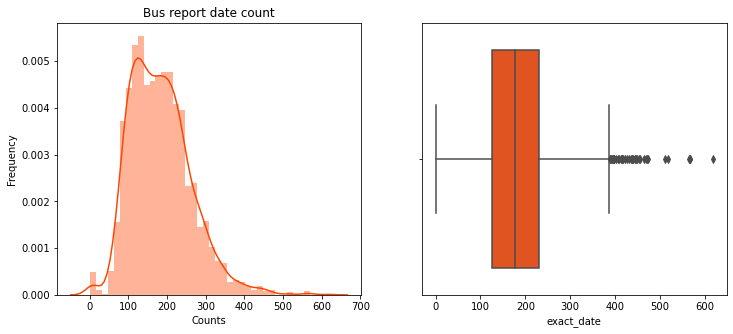

In [14]:
bus_date_counts = actual_delay.exact_date.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(bus_date_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Bus report date count");

sns.boxplot(bus_date_counts, ax=ax[1], color="orangered");

In [15]:
# a function to find quantiles, or where most data are.
def compute_quantiles(col_counts):
    Q1 =  np.quantile(col_counts, 0.25)
    Q3 =  np.quantile(col_counts, 0.75)
    IQR = Q3 - Q1
    print('Most data are within %d to %d.'%(Q1,Q3))
    print('Median is', np.quantile(col_counts, 0.5))
    print('The data are usually below %d.'%np.quantile(col_counts, 0.95))
    
    lower_fence = Q1 - 1.5 * (IQR)
    upper_fence = Q3  + 1.5 * (IQR)
    outlier = col_counts[col_counts < lower_fence].sum() + col_counts[col_counts > upper_fence].sum()
    print('Anything above %d and below %d is an outlier.'%(upper_fence,lower_fence))
    print("There are %d outliers." %outlier)
    print('Maximum occurence is %d of %s.' %(col_counts.max(), col_counts.index[0]))

In [16]:
compute_quantiles(bus_date_counts)

Most data are within 125 to 230.
Median is 176.0
The data are usually below 320.
Anything above 387 and below -32 is an outlier.
There are 17769 outliers.
Maximum occurence is 617 of 2014-01-07.


### 3.4.2 Delay by Exact Time Counts

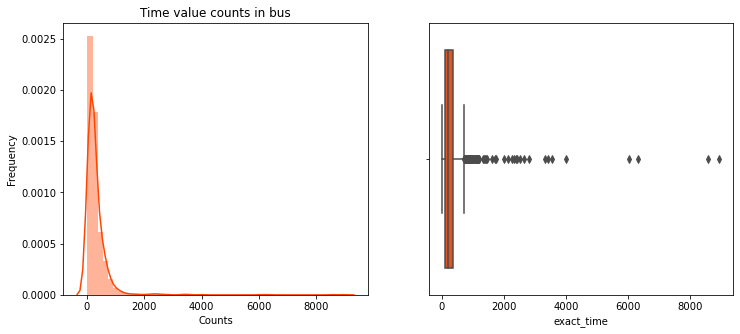

In [17]:
bus_time_counts = actual_delay.exact_time.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(bus_time_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Time value counts in bus");

sns.boxplot(bus_time_counts, ax=ax[1], color="orangered");

In [18]:
compute_quantiles(bus_time_counts)

Most data are within 100 to 348.
Median is 207.0
The data are usually below 784.
Anything above 720 and below -272 is an outlier.
There are 138391 outliers.
Maximum occurence is 8945 of 3:00:00 PM.


### Insights
- A heavily right skewed distribution shown above, this means that certain time has way more delays than others. 

### 3.4.3 More on continuous variables

In [19]:
# initialize continuous variables
bus_cont = actual_delay[['route_num','vehicle','year','month','day','hour','min','delay_min','gap_min']]

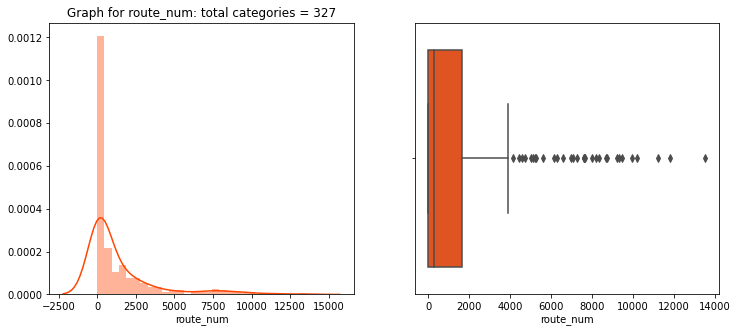

Most data are within 2 to 1624.
Median is 267.0
The data are usually below 7492.
Anything above 4057 and below -2431 is an outlier.
There are 241250 outliers.
Maximum occurence is 13515 of 29.




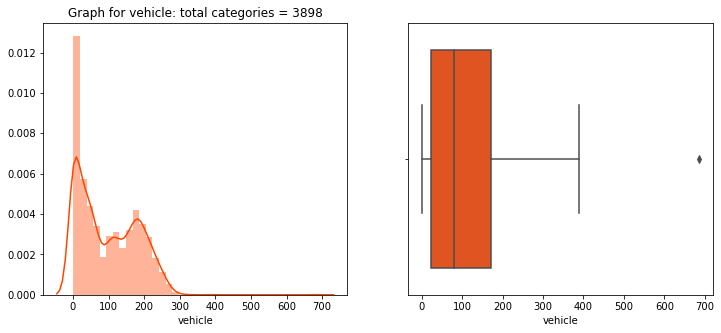

Most data are within 22 to 171.
Median is 81.0
The data are usually below 232.
Anything above 394 and below -201 is an outlier.
There are 685 outliers.
Maximum occurence is 685 of 0.0.




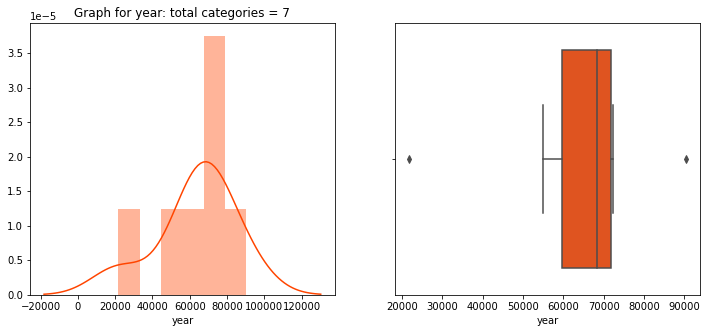

Most data are within 59532 to 71860.
Median is 68242.0
The data are usually below 84969.
Anything above 90353 and below 41039 is an outlier.
There are 112139 outliers.
Maximum occurence is 90374 of 2014.




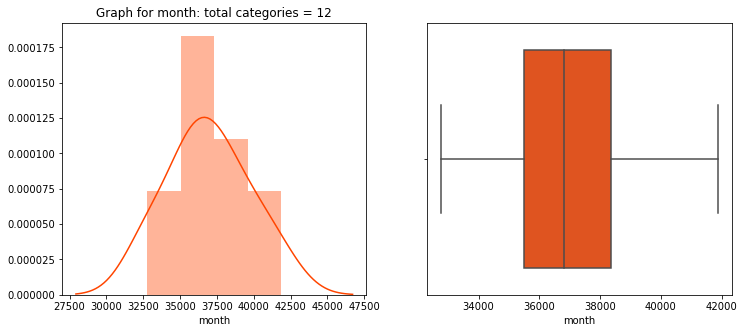

Most data are within 35486 to 38371.
Median is 36806.5
The data are usually below 41038.
Anything above 42698 and below 31160 is an outlier.
There are 0 outliers.
Maximum occurence is 41873 of 1.




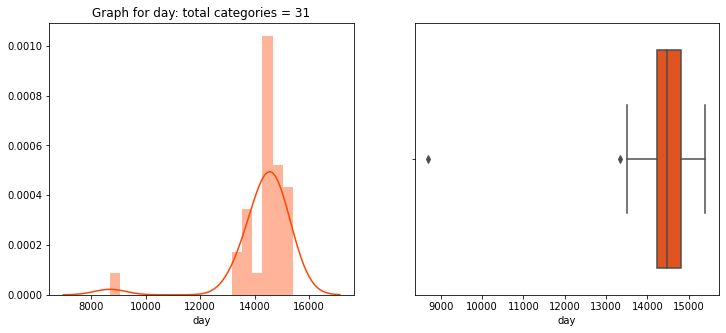

Most data are within 14231 to 14820.
Median is 14464.0
The data are usually below 15245.
Anything above 15704 and below 13346 is an outlier.
There are 22038 outliers.
Maximum occurence is 15398 of 12.




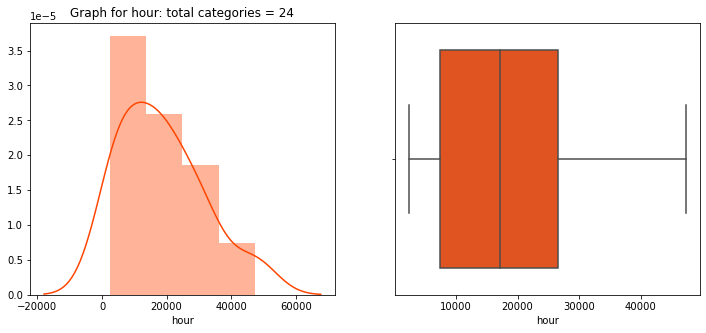

Most data are within 7361 to 26625.
Median is 17178.5
The data are usually below 45121.
Anything above 55522 and below -21535 is an outlier.
There are 0 outliers.
Maximum occurence is 47331 of 6.




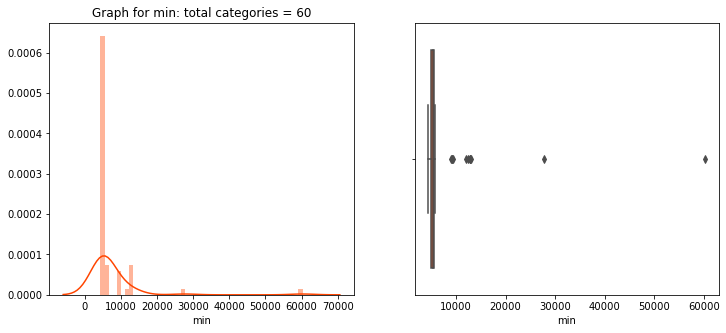

Most data are within 4867 to 5633.
Median is 5250.5
The data are usually below 12889.
Anything above 6783 and below 3717 is an outlier.
There are 200111 outliers.
Maximum occurence is 60250 of 0.




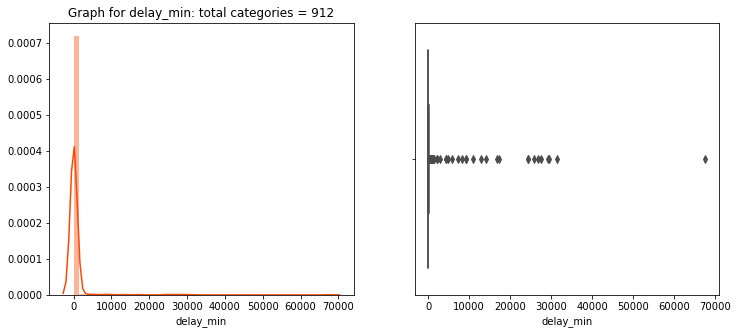

Most data are within 2 to 17.
Median is 4.0
The data are usually below 206.
Anything above 39 and below -20 is an outlier.
There are 437747 outliers.
Maximum occurence is 67630 of 10.0.




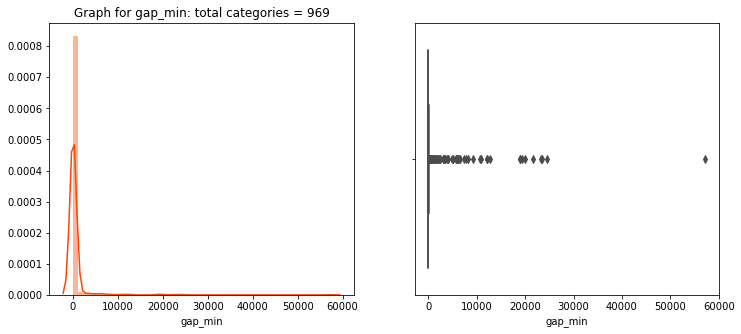

Most data are within 2 to 19.
Median is 5.0
The data are usually below 677.
Anything above 44 and below -23 is an outlier.
There are 436457 outliers.
Maximum occurence is 57189 of 20.0.




In [20]:
# Using a for loop to plot each continous variables and compute quantiles.
for col in bus_cont.columns:
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    cont_num = bus_cont[col].value_counts()
    chart = sns.distplot(cont_num, ax=ax[0], color="orangered", kde=True)
    ax[0].set_title("Graph for %s: total categories = %d" %(col, len(cont_num)))
    sns.boxplot(cont_num, ax=ax[1], color="orangered")
    plt.show()

    compute_quantiles(cont_num)
    print('\n')

### 3.4.4 Correlation Matrix

<AxesSubplot:>

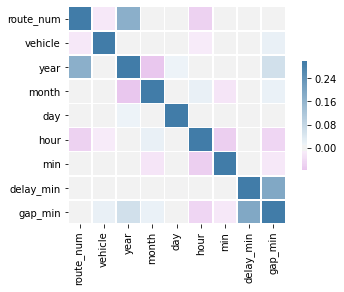

In [21]:
# check correlations between continuous variables
cmap = sns.diverging_palette(660, 600, as_cmap=True)
sns.heatmap(bus_cont.corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Insights:

- There's a positive correlation between route number and year, although it's unclear of what this mean. 
- Gaps and delays are positively correlated, intuitively speaking that a long delay results in a long gap time from the bus ahead of the following bus.
- There are no signs showing that delays have any correlation other than gap time.

## 3.5 Analyzing Categorical Variables (using bar graphs)

In [22]:
# dataframe for categorical variables
bus_cat = actual_delay[['year','month','day','hour','day_of_week', 'incident', 'at_station', 'direction_simp', 'delay_type']]

### 3.5.1 Bar graphs

Graph for year: total categories = 7


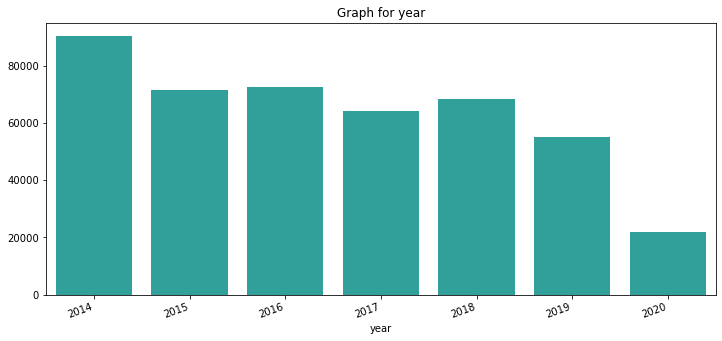

Graph for month: total categories = 12


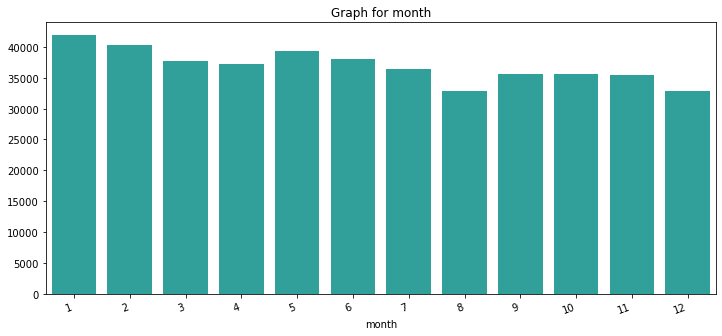

Graph for day: total categories = 31


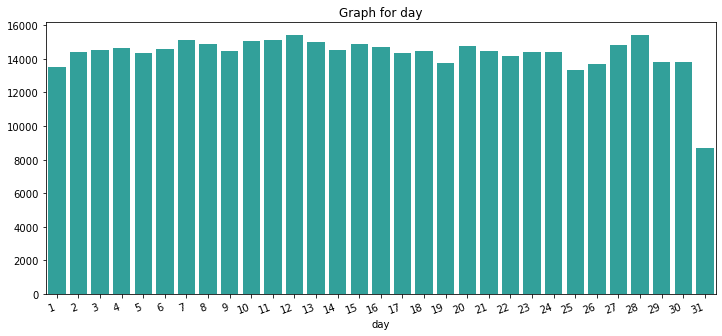

Graph for hour: total categories = 24


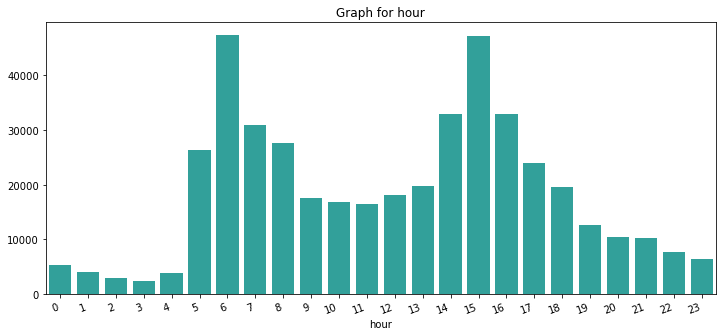

Graph for day_of_week: total categories = 7


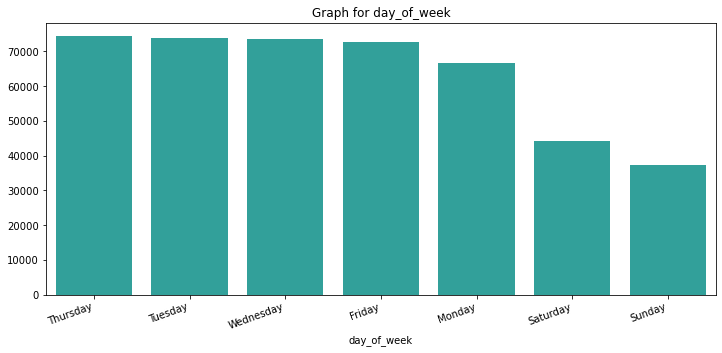

Graph for incident: total categories = 13


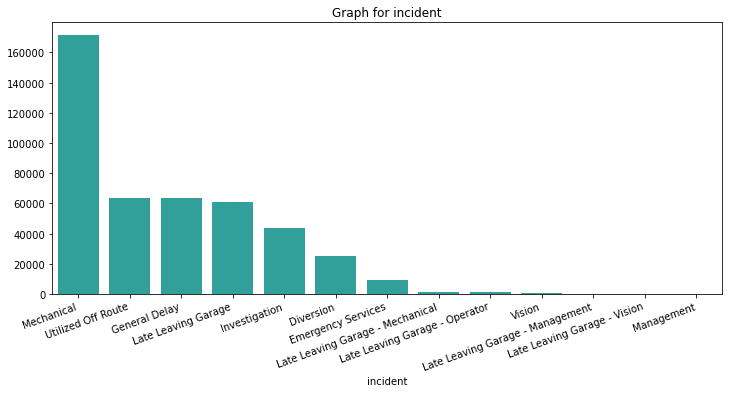

Graph for at_station: total categories = 2


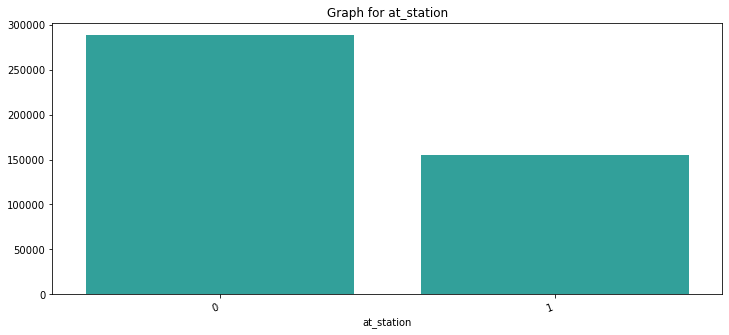

Graph for direction_simp: total categories = 5


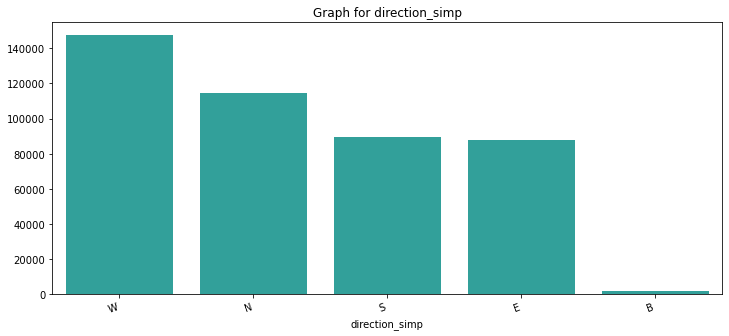

Graph for delay_type: total categories = 3


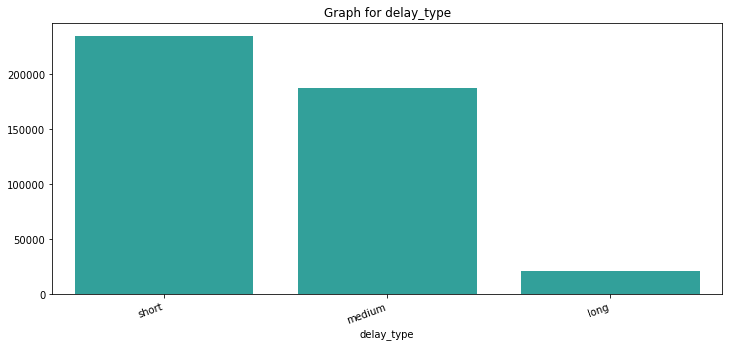

In [23]:
# Using a for loop to plot each categorical variable.
for col in bus_cat.columns:
    plt.figure(figsize=(12,5))
    cat_num = bus_cat[col].value_counts()
    print("Graph for %s: total categories = %d" %(col, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num,color="lightseagreen")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
    plt.ylabel("")
    plt.xlabel(col)
    plt.title("Graph for %s" %(col))
    plt.show()

### Insights
Graph for year:
- 2014 has the most number of delay recorded.
- 2015 to 2018 has a relatively even distribution of delays recorded.
- Although 2020 has the least number of delay recorded, keep in mind that we don't have 8 months of data from 2020 and there's a pandemic in this year.

Graph for month:
- January being the peak of this graph might be a sign of holiday effect.

Graph for day:
- We observe that day 12 and day 28 peaked at this graph and the rest of the days are pretty even, except for day 31.

Graph of hour:
- 6 AM and 3 PM have the most recorded delays. Midnight to 3 AM have the least record of delays.

Graph for day of the week:
- We observe that the weekdays have almost twice more delays than weekends.

Graph for incident:
- Mechanical incident dominates this graph being the incident with most delay counts and more than twice of the second place incident.
- Anything with a combination of late leaving garage, or vision and management almost have no effects to the bus delays.

Graph for at_station:
- This graph shows that almost roughly 300000 buses weren't delay at stations whereas 150000 were delay at stations.

Graph for direction:
- More buses are like to be delayed going west followed by north, south and east.
- Buses going both ways are not likely to be delay as there are not many buses operate on going both ways.

Graph for delay type:
- Most delays are relatively short range from 0 to 10 mins
- Not many record in this dataset are recorded as 0 minute delay in this case compare to the subway dataset.


## 3.6 Top 20 Location and Bus Route (using count plots)

### 3.6.1 Top 20 Location

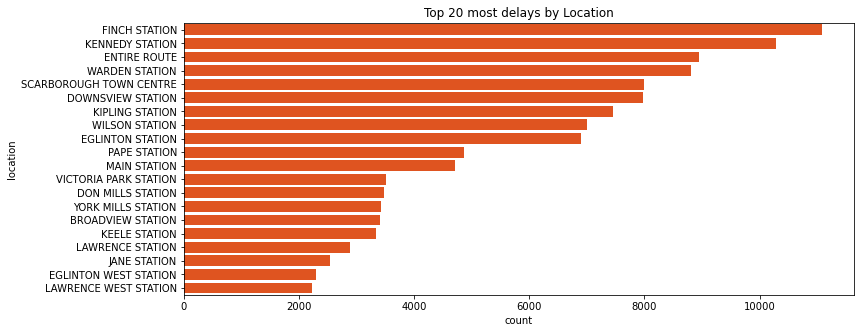

In [24]:
plt.figure(figsize=(12,5))
sns.countplot(y=actual_delay.location, order= actual_delay.location.value_counts().iloc[:20].index, color="orangered");
plt.title("Top 20 most delays by Location");

### 3.6.2 Top 20 Bus Route

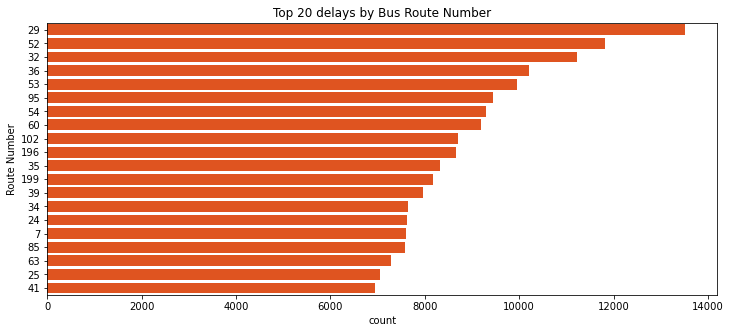

In [36]:
plt.figure(figsize=(12,5))

sns.countplot(y=actual_delay.route_num, order= actual_delay.route_num.value_counts().iloc[:20].index, color="orangered");
plt.title("Top 20 delays by Bus Route Number");
plt.ylabel('Route Number');

## 3.7 Comparing delays vs others (using bar graphs)

### 3.7.1 Delays vs Day of the Week

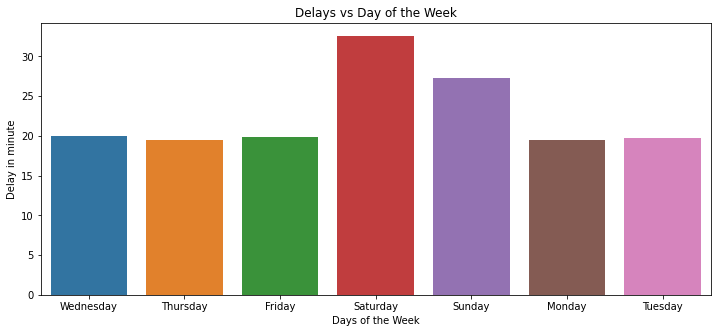

In [26]:
plt.figure(figsize=(12,5));
sns.barplot(x='day_of_week', y='delay_min', data= actual_delay, ci=None);
plt.title("Delays vs Day of the Week");
plt.xlabel("Days of the Week");
plt.ylabel("Delay in minute");

### Insights
- From our previous countplot, we saw that weekdays have more delays than weekends, but looking at this graph we can tell that weekends are rougly 5 to 10 minutes longer than weekdays.

### 3.7.2 Delays vs Incident

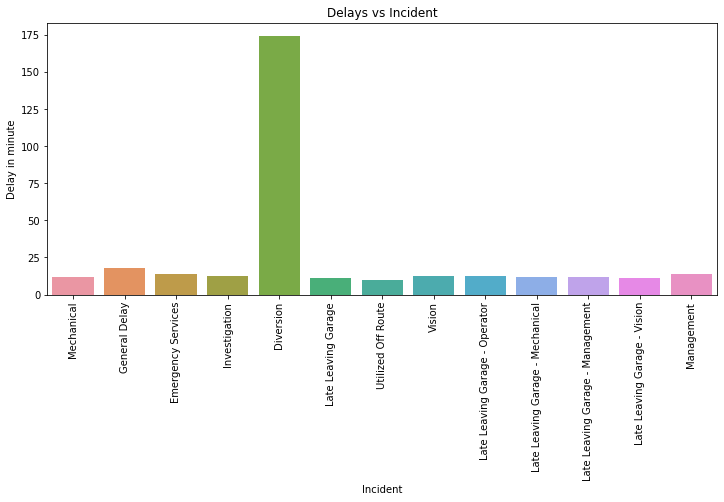

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x='incident', y='delay_min', data= actual_delay, ci=None);
plt.title("Delays vs Incident")
plt.xlabel("Incident")
plt.ylabel("Delay in minute");
plt.xticks(rotation= 90);

### Insights
- Buses had diversion incidents could be 175 minutes late for schedule, that's insane!
- On the other hand, the rest of the incidents took a much more reasonable delay time (less than 20 minutes).

### 3.7.3 Delays vs Hour

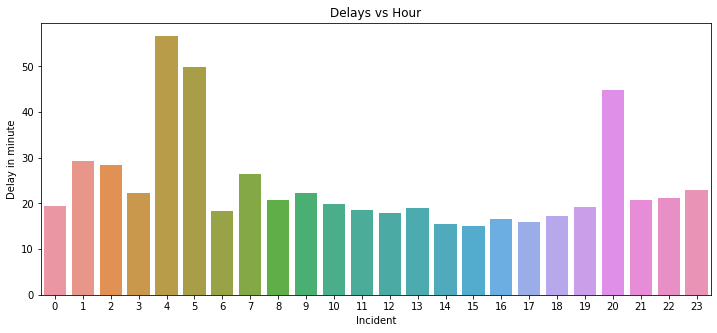

In [28]:
plt.figure(figsize=(12,5))
sns.barplot(x='hour', y='delay_min', data= actual_delay, ci=None);
plt.title("Delays vs Hour")
plt.xlabel("Incident")
plt.ylabel("Delay in minute");

### Insights
- Delay at 4 - 5 AM and 8 PM took more than 40 minutes.
- Previously, we observed that 6 AM and 3 PM had the most number of delays. Fortunately, in this graph, we see that the delay time during busier (or rush) hours had relatively shorter delay times.

### 3.7.4 Delays vs Direction

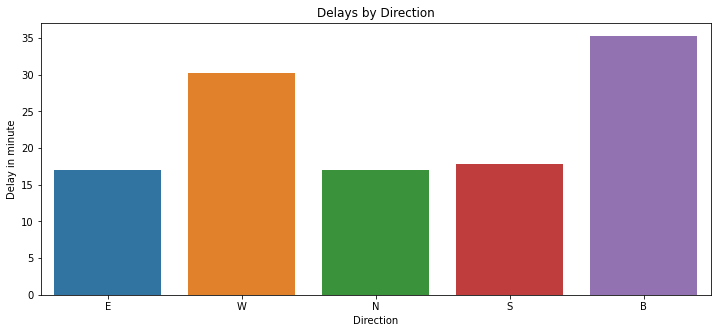

In [29]:
plt.figure(figsize=(12,5))
sns.barplot(x='direction_simp', y='delay_min', data= actual_delay, ci=None);
plt.title("Delays by Direction")
plt.xlabel("Direction")
plt.ylabel("Delay in minute");

### Insights
- Not only buses headed west took the second longest time, they also happened very frequently.
- Surprisingly, buses going both ways are first in this graph, but they didn't happen as frequently as the buses went other directions.

### 3.7.5 Delays vs Days of the Week and Direction

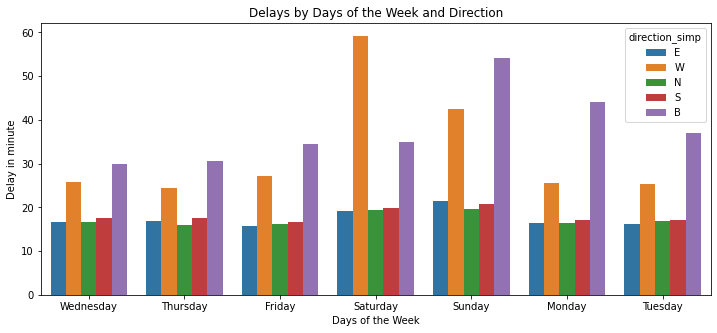

In [30]:
plt.figure(figsize=(12,5))
sns.barplot(x='day_of_week', y='delay_min',hue='direction_simp', data= actual_delay, ci=None);
plt.title("Delays by Days of the Week and Direction")
plt.xlabel("Days of the Week")
plt.ylabel("Delay in minute");

### Insights
- Buses headed bothways took the longest time in most of the week and much longer on the weekends.

## 3.8 Using WordCloud to visualize what is the most frequent recorded Location 

In [33]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [34]:
# Discard null values in location column
bus_df_notna = actual_delay[actual_delay['location'].notna()]

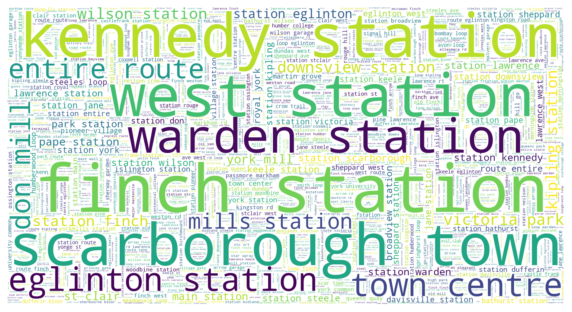

In [35]:
words = " ".join(bus_df_notna['location'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered]) 

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()